# Students Do: Clustering costumers for e-commerce

Once you have prepared the data, it's time to start looking for patterns that could lead you to define customer clusters. After talking with the CFO of the company about the next quarter goals, you figured out that one way to understand customers, from the available data, is to cluster them according their spending capacity, however you have to find how many groups you can define.

You decide to use your new unsupervised learning skills and put K-Means in action!

In [26]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import plotly.express as px
import hvplot.pandas


## Instructions

Accomplish the following tasks and use K-Means to cluster the customer data.

1. Load the data you already cleaned into a DataFrame and call it `df_shopping`.

In [27]:
# Loading data
file_path = Path("../Resources/shopping_data_cleaned.csv")
df_shopping = pd.read_csv(file_path)
df_shopping.head(10)

,Gender,Age,Annual Income,Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
5,0,22,17.0,76
6,0,35,18.0,6
7,0,23,18.0,94
8,1,64,19.0,3
9,0,30,19.0,72


2. Find the best number of clusters using the Elbow Curve.

In [28]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_shopping)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k":k, "inertia":inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)



:Curve   [k]   (inertia)

3. Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

In [37]:
def get_clusters(k, data):
    #Initialize KMeans model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["clusters"] = model.labels_

    return data


4. Use the `get_clusters()` function with the two best values for `k` according to your personal opinion; plot the resulting clusters as follows and postulate your conclusions:

 * Create a 2D-Scatter plot using `hvPlot` to analyze the clusters using `x="Annual Income"` and `y="Spending Score (1-100)"`.

 * Create a 3D-Scatter plot using Plotly Express to analyze the clusters using `x="Age"`, `y="Spending Score (1-100)"` and `z="Annual Income"`.

**Analyzing Clusters with the First Best Value of `k`**

In [38]:
# Looking for clusters the first best value of k
five = get_clusters(5, df_shopping)
five.head()


,Gender,Age,Annual Income,Spending Score (1-100),class,clusters
0,1,19,15.0,39,4,0
1,1,21,15.0,81,0,3
2,0,20,16.0,6,4,0
3,0,23,16.0,77,0,3
4,0,31,17.0,40,4,0


In [41]:
# Plotting the 2D-Scatter with x="Annual Income" and y="Spending Score (1-100)"
df_shopping.hvplot.scatter(x="Annual Income", y="Spending Score (1-100)", by="clusters")


:NdOverlay   [clusters]
   :Scatter   [Annual Income]   (Spending Score (1-100))

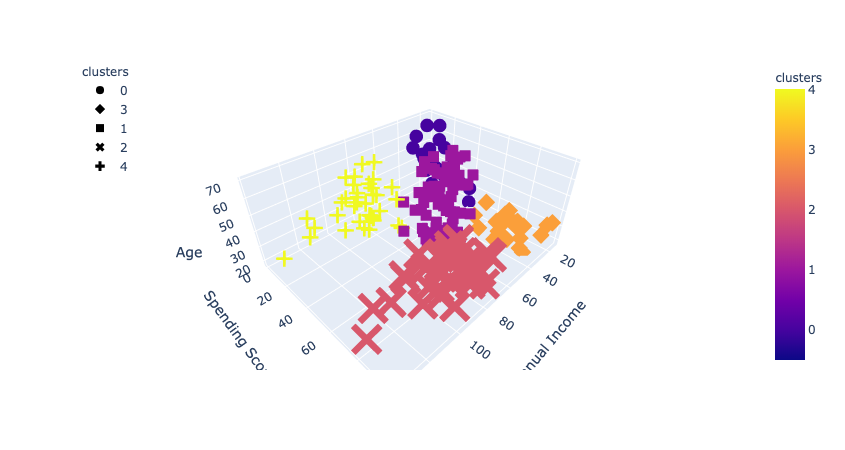

In [40]:
# Plotting the 3D-Scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    df_shopping,
    x="Annual Income",
    y="Spending Score (1-100)",
    z="Age",
    color="clusters",
    symbol="clusters",
    width=100,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


**Analyzing Clusters with the Second Best Value of `k`**

In [42]:
# Looking for clusters the second best value of k
six = get_clusters(6, df_shopping)
six.head()


,Gender,Age,Annual Income,Spending Score (1-100),class,clusters
0,1,19,15.0,39,4,5
1,1,21,15.0,81,0,1
2,0,20,16.0,6,4,5
3,0,23,16.0,77,0,1
4,0,31,17.0,40,4,5


In [43]:
# Plotting the 2D-Scatter with x="Annual Income" and y="Spending Score (1-100)"
df_shopping.hvplot.scatter(x="Annual Income", y="Spending Score (1-100)", by="clusters")


:NdOverlay   [clusters]
   :Scatter   [Annual Income]   (Spending Score (1-100))

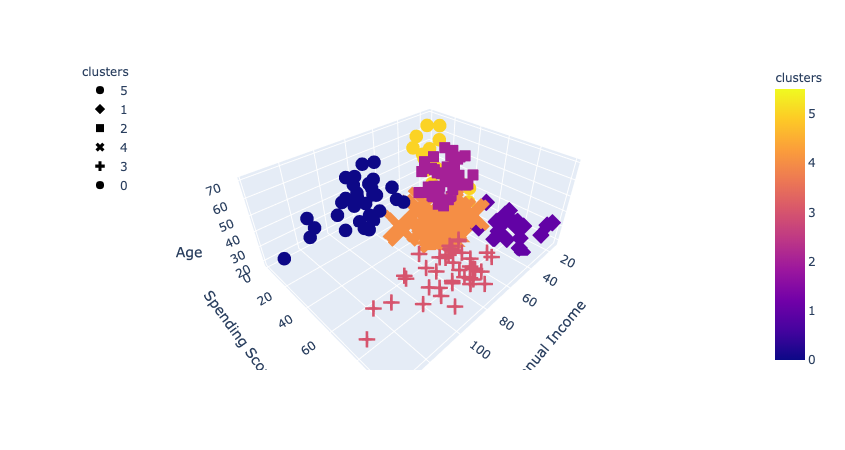

In [44]:
# Plotting the 3D-Scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    df_shopping,
    x="Annual Income",
    y="Spending Score (1-100)",
    z="Age",
    color="clusters",
    symbol="clusters",
    width=100,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


**Conclusions**

* Write your conclusions here.